<a href="https://colab.research.google.com/github/Byskutx/PYTHON_ESILV/blob/main/PYTHONTEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ------------------------
# Titre : Analyse des Données DVF
# Auteur : Ethan Binisti, Yasser Bouisk, Bard Bouchabchoub
# Date : 28 janvier 2024
# ------------------------
Ce notebook vise à effectuer une analyse approfondie des données DVF (Demandes de valeurs foncières). Nous allons charger les données, les nettoyer, effectuer une analyse statistique de base, et créer une visualisation. Ensuite, nous intégrerons cette visualisation dans un projet Django pour créer une vitrine dynamique.

##Importation des modules

On importe les packages python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

##Importer les données

Listes des data pour les différentes années

In [ ]:
url2022 = "https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20231010-093059/valeursfoncieres-2022.txt"
df_2022 = pd.read_csv(url2022, sep="|")

<ipython-input-27-2be8c0ba585a>:2: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv(url2022, sep="|")


In [ ]:
url2023 = "https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20231010-093302/valeursfoncieres-2023.txt"
df = pd.read_csv(url2023, sep="|")

<ipython-input-4-83ab38ea5119>:2: DtypeWarning: Columns (18,23,24,26,28,29,31,32,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url2023, sep="|")


In [ ]:
url2019 = "https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20231010-092100/valeursfoncieres-2019.txt"
df_2019 = pd.read_csv(url2019, sep="|")

<ipython-input-29-dac3b597aaab>:2: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv(url2019, sep="|")


On commence par étudier la data de l'année 2023

##Affichage des 10 premières lignes du DataFrame pour comprendre la structure des données


In [ ]:
type(df)
df.head(10)

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,2.0,Appartement,NaN,233.0,8.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2023,Vente,...,NaN,0,1.0,Maison,NaN,64.0,3.0,S,NaN,988.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,835.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,0,1.0,Maison,NaN,73.0,3.0,S,NaN,835.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,835.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2023,Vente,...,NaN,0,1.0,Maison,NaN,136.0,7.0,S,NaN,921.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2023,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,17050.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,06/01/2023,Echange,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,124.0


##Vérification du taux des données manquantes dans la data

In [ ]:
df.isnull().sum()/len(df)*100

Identifiant de document       100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                   0.000000
Nature mutation                 0.000000
Valeur fonciere                 0.684536
No voie                        36.150681
B/T/Q                          95.445738
Type de voie                   38.496840
Code voie                       0.736926
Voie                            0.747365
Code postal                     0.742080
Commune                         0.000000
Code departement                0.000000
Code commune                    0.000000
Prefixe de section             95.710235
Section                         0.006263
No plan                         0.000000
No Volume                      99.792330
1er lot         

In [ ]:
df = df.drop(['Identifiant de document', '1 Articles CGI', '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI', 'B/T/Q', 'Prefixe de section', 'No Volume', '1er lot', 'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot', '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot', 'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot', 'Identifiant local', 'Nature culture speciale'], axis=1)

Ici, nous constatons que la base brute contient beaucoup de variables qui ont un taux de plus de 90% des données manquantes. Donc, pour ces variables, nous avons exclué dans notre jeu de données.
Pour les autres variables qui ont un taux de moins de 40%, nous les gardons.

##Distributions de fonctionnalités numériques

L’une des tâches d’exploration de données les plus éclairantes consiste à tracer les distributions des fonctionnalités.

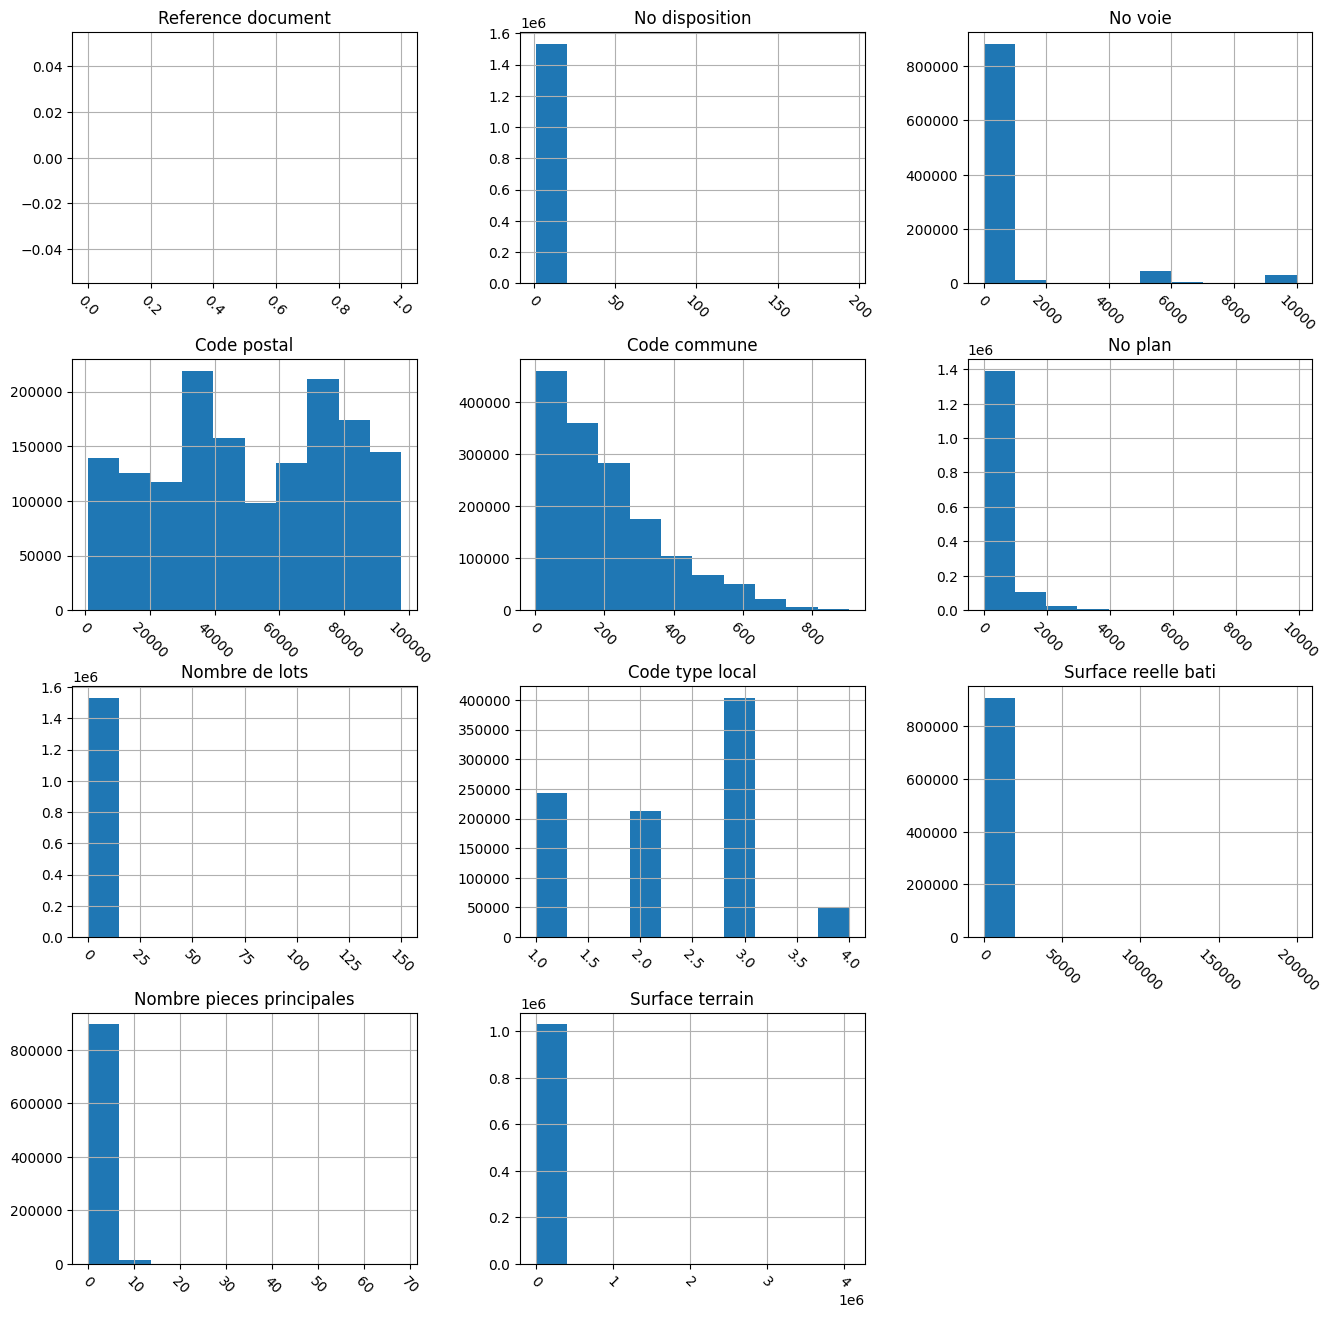

In [ ]:
df.hist(figsize=(16,16), xrot=-45)
plt.show()

##Quel est le nombre de lignes des données

In [ ]:
df.shape[0]

1532718

##Quel est le nombre de colonnes des données

In [ ]:
df.shape[1]

22

##Quel est le type de données

In [ ]:
df.dtypes

Reference document           float64
No disposition                 int64
Date mutation                 object
Nature mutation               object
Valeur fonciere               object
No voie                      float64
Type de voie                  object
Code voie                     object
Voie                          object
Code postal                  float64
Commune                       object
Code departement              object
Code commune                   int64
Section                       object
No plan                        int64
Nombre de lots                 int64
Code type local              float64
Type local                    object
Surface reelle bati          float64
Nombre pieces principales    float64
Nature culture                object
Surface terrain              float64
dtype: object

##Vérification des types de données

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532718 entries, 0 to 1532717
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Reference document         0 non-null        float64
 1   No disposition             1532718 non-null  int64  
 2   Date mutation              1532718 non-null  object 
 3   Nature mutation            1532718 non-null  object 
 4   Valeur fonciere            1522226 non-null  object 
 5   No voie                    978630 non-null   float64
 6   Type de voie               942670 non-null   object 
 7   Code voie                  1521423 non-null  object 
 8   Voie                       1521263 non-null  object 
 9   Code postal                1521344 non-null  float64
 10  Commune                    1532718 non-null  object 
 11  Code departement           1532718 non-null  object 
 12  Code commune               1532718 non-null  int64  
 13  Section     

##Afficher les noms des colonnes du DataFrame restantes

In [ ]:
print(df.columns)

Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')


##Classement des types de local les plus vendus avec le prix moyens en euros


In [ ]:
df['Valeur fonciere'] = df['Valeur fonciere'].astype(str)

df['Valeur fonciere'] = pd.to_numeric(df['Valeur fonciere'].str.replace(',', '.'), errors='coerce')
df = df.dropna(subset=['Valeur fonciere'])
resultats = df.groupby('Type local').agg({'Valeur fonciere': ['count', 'mean']})
resultats.columns = ['Nombre de ventes', 'Prix moyen']
resultats['Prix moyen'] = resultats['Prix moyen'].round(0).astype(int)
resultats = resultats.sort_values(by='Nombre de ventes', ascending=False)
top_types_locaux = resultats.head(5)

print("Les cinq types de locaux les plus vendus avec le nombre de ventes et le prix moyen associé :")
print(top_types_locaux)


Les cinq types de locaux les plus vendus avec le nombre de ventes et le prix moyen associé :
                                          Nombre de ventes  Prix moyen
Type local                                                            
Dépendance                                          403195      412488
Maison                                              242247      313685
Appartement                                         212991      600285
Local industriel. commercial ou assimilé             49451     2873279


##Classement des arondissements de Paris avec la valeur foncière du plus cher au moins cher

In [ ]:
df['Valeur fonciere'] = pd.to_numeric(df['Valeur fonciere'], errors='coerce')
df_paris = df[df['Code postal'].astype(str).str.startswith('75')]
valid_arrondissements = (df_paris['Code postal'].astype(str).str.len() == 7)
df_valid_arrondissements = df_paris[valid_arrondissements]
valeur_fonciere_par_arrondissement = df_valid_arrondissements.groupby('Code postal')['Valeur fonciere'].sum()
if not df_valid_arrondissements.empty:
    sorted_arrondissements = valeur_fonciere_par_arrondissement.sort_values(ascending=False)
    for code_postal in sorted_arrondissements.index:
        valeur_fonciere = sorted_arrondissements[code_postal]
        print(f"La valeur foncière totale pour l'arrondissement {code_postal} est : {valeur_fonciere:.2f} euros")
else:
    print("Aucune donnée pour les arrondissements de Paris.")


La valeur foncière totale pour l'arrondissement 75001.0 est : 70651048811.24 euros
La valeur foncière totale pour l'arrondissement 75008.0 est : 24960007035.80 euros
La valeur foncière totale pour l'arrondissement 75016.0 est : 14703222760.32 euros
La valeur foncière totale pour l'arrondissement 75009.0 est : 6440035374.30 euros
La valeur foncière totale pour l'arrondissement 75017.0 est : 4815150966.84 euros
La valeur foncière totale pour l'arrondissement 75015.0 est : 4603372565.81 euros
La valeur foncière totale pour l'arrondissement 75010.0 est : 3872068878.86 euros
La valeur foncière totale pour l'arrondissement 75007.0 est : 2868758299.00 euros
La valeur foncière totale pour l'arrondissement 75006.0 est : 2497234291.08 euros
La valeur foncière totale pour l'arrondissement 75002.0 est : 2260951410.79 euros
La valeur foncière totale pour l'arrondissement 75012.0 est : 2052770524.22 euros
La valeur foncière totale pour l'arrondissement 75011.0 est : 1867008314.55 euros
La valeur fon

##Surface moyen pour chaque type de local

La surface moyenne des locaux de type Local industriel. commercial ou assimilé est : 411.46 m²
La surface moyenne des locaux de type Maison est : 101.46 m²
La surface moyenne des locaux de type Appartement est : 55.75 m²
La surface moyenne des locaux de type Dépendance est : 0.00 m²


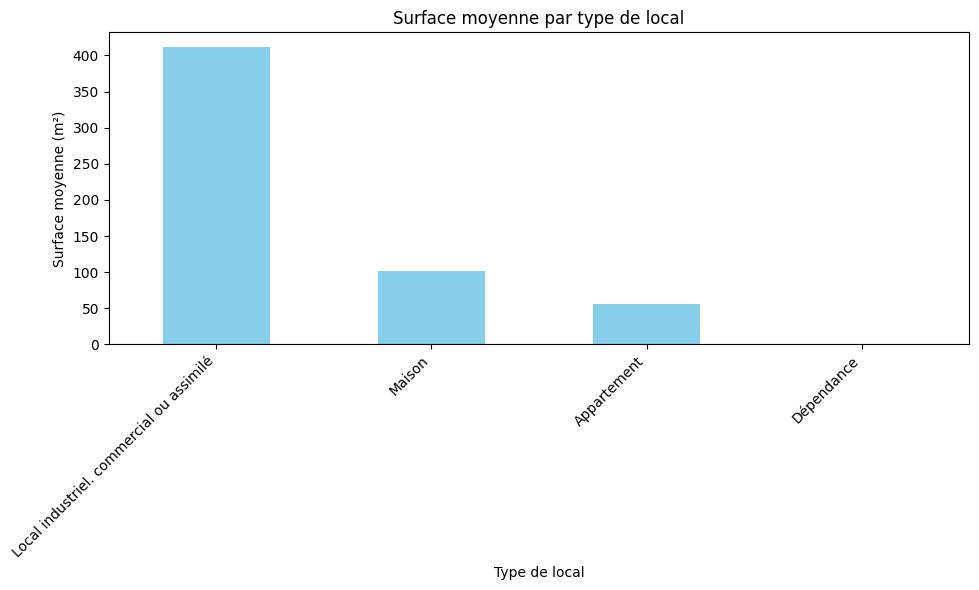

In [ ]:
df['Surface reelle bati'] = pd.to_numeric(df['Surface reelle bati'], errors='coerce')
moyenne_par_type = df.groupby('Type local')['Surface reelle bati'].mean()
moyenne_par_type = moyenne_par_type.sort_values(ascending=False)
for type_local, surface_moyenne in moyenne_par_type.items():
    print(f"La surface moyenne des locaux de type {type_local} est : {surface_moyenne:.2f} m²")

plt.figure(figsize=(10, 6))
moyenne_par_type.plot(kind='bar', color='skyblue')
plt.title('Surface moyenne par type de local')
plt.xlabel('Type de local')
plt.ylabel('Surface moyenne (m²)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##Nombre de pièces moyennes par local




In [ ]:
df['Nombre pieces principales'] = pd.to_numeric(df['Nombre pieces principales'], errors='coerce')
moyenne_pieces_par_local = df.groupby('Type local')['Nombre pieces principales'].mean()

print("Nombre moyen de pièces principales par type de local :")
print(moyenne_pieces_par_local)


Nombre moyen de pièces principales par type de local :
Type local
Appartement                                 2.542449
Dépendance                                  0.000000
Local industriel. commercial ou assimilé    0.000000
Maison                                      4.155653
Name: Nombre pieces principales, dtype: float64


##Répartition de la variable type local

In [ ]:
df['Type local'].value_counts(dropna = False, normalize = True).head()

NaN                                         0.403581
Dépendance                                  0.264872
Maison                                      0.159140
Appartement                                 0.139921
Local industriel. commercial ou assimilé    0.032486
Name: Type local, dtype: float64

<ipython-input-18-41602234d5c9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Type local', data=df, palette=palette)
<ipython-input-18-41602234d5c9>:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(y='Type local', data=df, palette=palette)


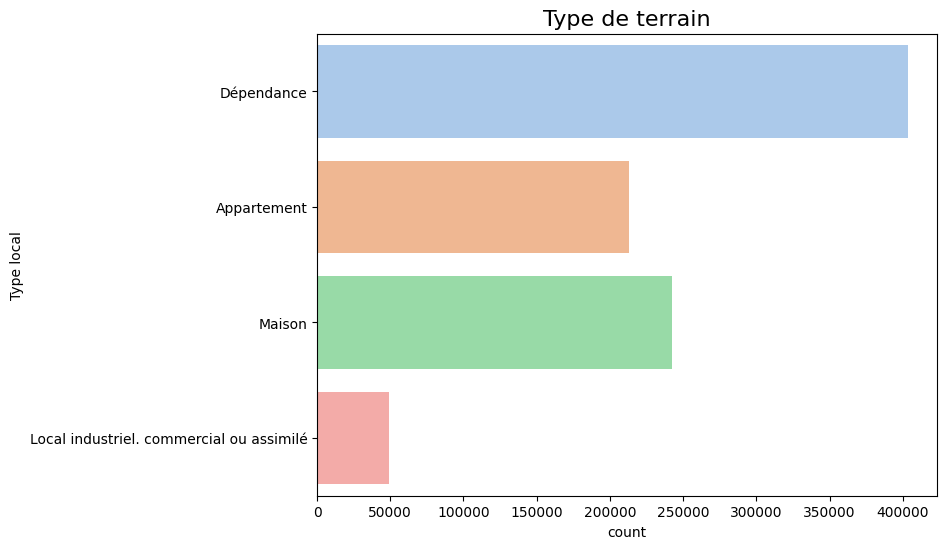

In [ ]:
palette = sns.color_palette("pastel")
plt.figure(figsize=(8, 6))
plt.title('Type de terrain', fontsize=16)
sns.countplot(y='Type local', data=df, palette=palette)

plt.show()


Nous pouvons conclure que le nombre total de différents types de propriétés qui existent, c'est le nombre de dépendances à vendre qui est le plus élevé par rapport à l'appartement, maison et aux autres types de terrains.

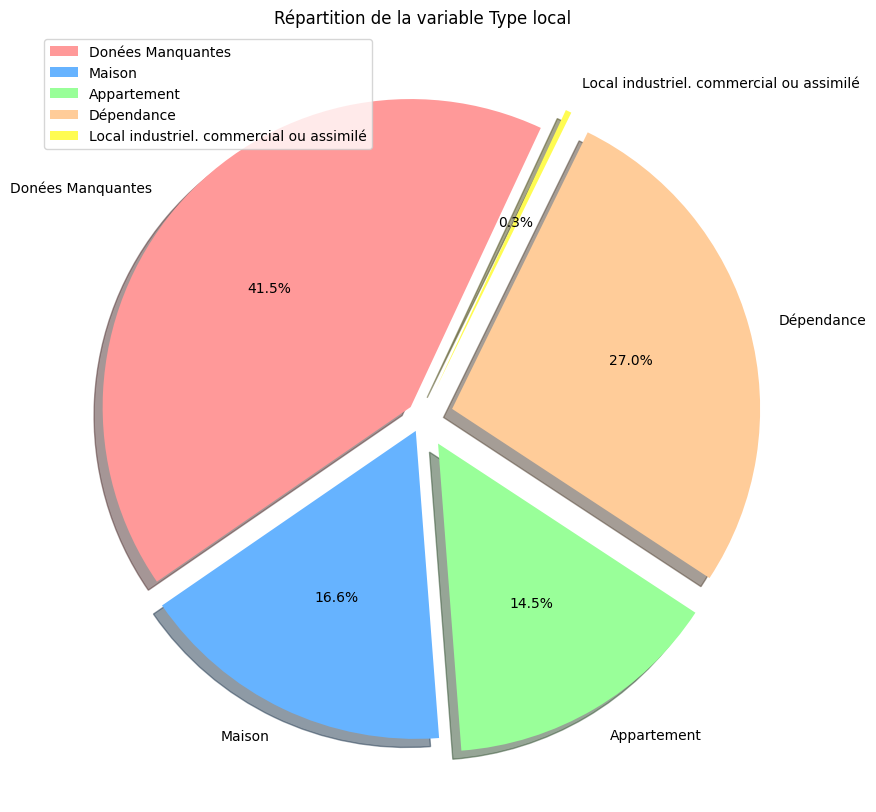

In [ ]:
plt.figure(figsize=(10,10))
labels = ['Donées Manquantes', 'Maison', 'Appartement', 'Dépendance', 'Local industriel. commercial ou assimilé']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fffc52']
area = [40, 16, 14, 26, 0.3]
explode = (0.05,0.05,0.1,0.1,0.1)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.title(label= 'Répartition de la variable Type local')
plt.legend()
plt.show()

Ici, on voit que pour les transactions immobilières en 2023, les types de biens sont répartie différement :
              

*   41.5% des transactions n'**ont pas été saisi** par le type de biens.

*   27%  des transactions concernent des **dépendances** en France
*   16.6% des transantions concernent **les maisons** en France.


*   14.5% des transantions concernent **les appartements** en France.

*   Les transactions des **bureaux/commerces/entrepôts** sont juste à 0.3% par rapport au volume totale.


##Répartition de la variable nature mutation

In [ ]:
df['Nature mutation'].value_counts(dropna = False, normalize = True).head()

Vente                                 0.943687
Vente en l'état futur d'achèvement    0.041964
Echange                               0.010508
Vente terrain à bâtir                 0.002889
Adjudication                          0.000897
Name: Nature mutation, dtype: float64

<ipython-input-21-2433765244b6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Nature mutation', data=df, palette=palette)
<ipython-input-21-2433765244b6>:4: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.countplot(y='Nature mutation', data=df, palette=palette)


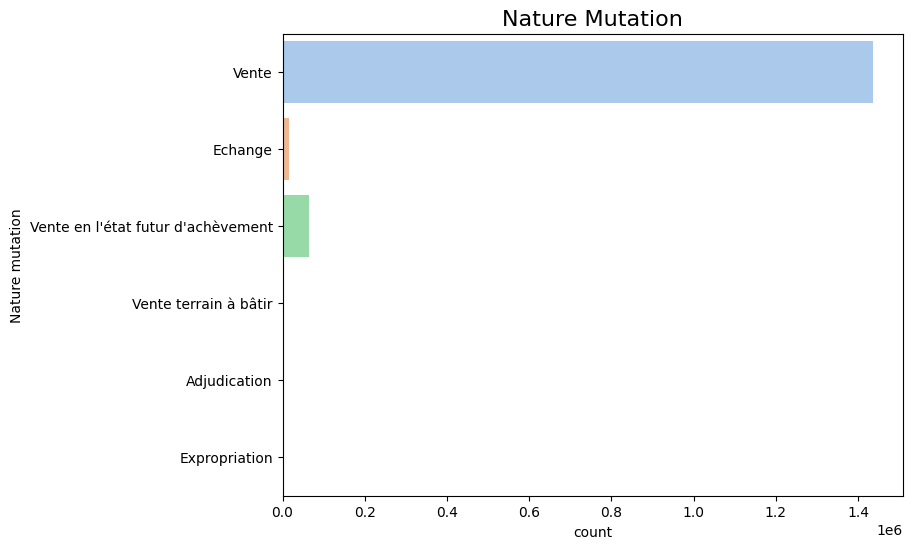

In [ ]:
palette = sns.color_palette("pastel")
plt.figure(figsize=(8, 6))
plt.title('Nature Mutation', fontsize=16)
sns.countplot(y='Nature mutation', data=df, palette=palette)

plt.show()


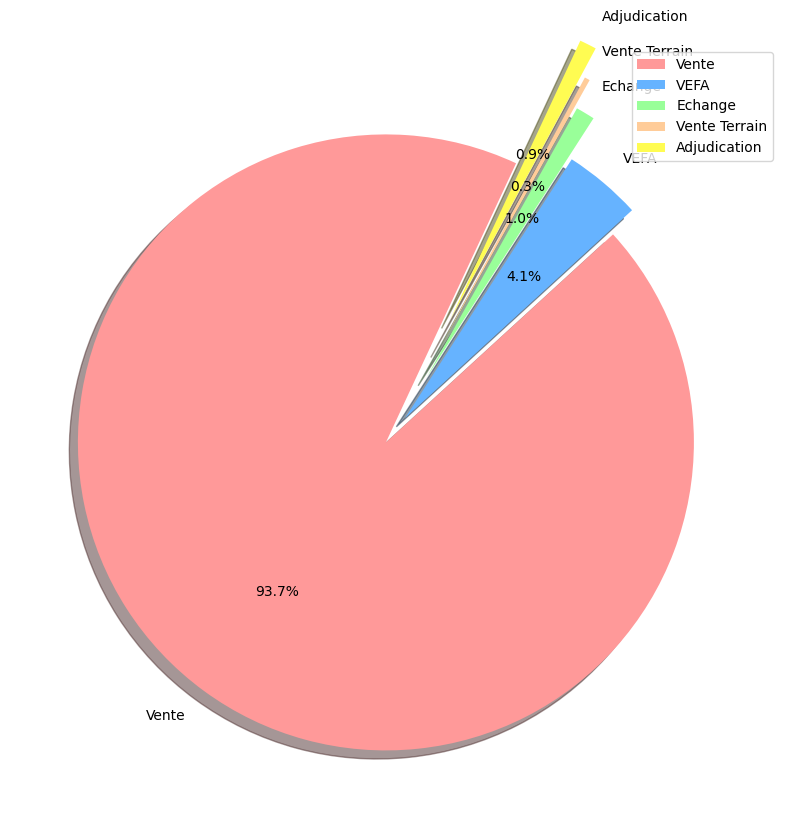

In [ ]:
plt.figure(figsize=(10,10))
labels = ['Vente', 'VEFA', 'Echange', 'Vente Terrain', 'Adjudication']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fffc52']
area = [94, 4.1, 1.0, 0.28, 0.89]
explode = (0.05,0.05,0.2,0.3,0.4)
plt.pie(area, labels=labels, explode=explode, colors= colors, startangle=65, autopct='%1.1f%%',shadow='True')
plt.legend()
plt.show()

Ici, nous trouvons que 93.7% des tranctions immobilières en 2023 pour tous les régions en France sont des ventes immobilières. La vente en VEFA est juste 4.1% et les restes sont moins de 1% pour les autres types de transactions. Du coup, nous pourrons travailler sur les Vente dans ce jeu de données, en excluant tous les autres types de transactions.

## Les cultures naturelles à vendre en 2023

<ipython-input-23-18140d5b59cd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Nature culture', data=df, palette=palette)
<ipython-input-23-18140d5b59cd>:4: UserWarning: 
The palette list has fewer values (10) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y='Nature culture', data=df, palette=palette)


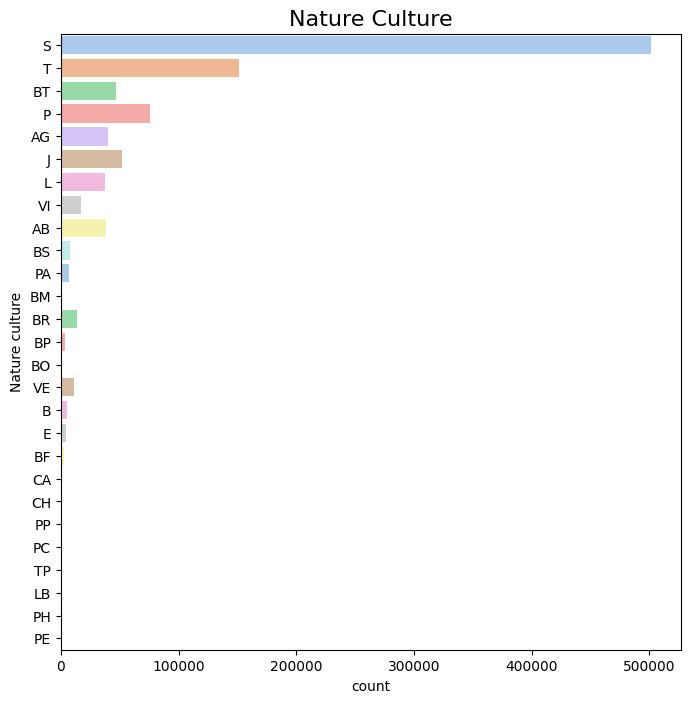

In [ ]:
palette = sns.color_palette("pastel")
plt.figure(figsize=(8, 8))
plt.title('Nature Culture', fontsize=16)
sns.countplot(y='Nature culture', data=df, palette=palette)

plt.show()

Le graphique ci-dessus représente le nombre de cultures naturelles des terres. Nous pouvons en conclure que les sols, les terres et les pâturages sont pour la plupart en vente en 2023. Le jardin, les terrains à bâtir et les terrains d'agrément sont les prochains biens à vendre.

##Classement des 10 codes postals avec le plus de vente de propriétées

In [ ]:
df['Code postal'] = df['Code postal'].astype(str)
df['Valeur fonciere'] = df['Valeur fonciere'].astype(str)
df['Valeur fonciere'] = pd.to_numeric(df['Valeur fonciere'].str.replace(',', '.'), errors='coerce')
df = df.dropna(subset=['Valeur fonciere'])
resultats = df.groupby('Code postal').agg({'Valeur fonciere': ['count', 'mean']})
resultats.columns = ['Nombre de ventes', 'Prix moyen']
resultats['Prix moyen'] = resultats['Prix moyen'].round(0).astype(int)
resultats = resultats.sort_values(by='Nombre de ventes', ascending=False)
top_codes_postaux = resultats.head(10)
print("Les 10 codes postaux avec le plus grand nombre de ventes et le prix moyen associé :")
print(top_codes_postaux)

Les 10 codes postaux avec le plus grand nombre de ventes et le prix moyen associé :
             Nombre de ventes  Prix moyen
Code postal                              
nan                     11329     3607268
25000.0                  5553     1098566
75016.0                  4171     3525107
75015.0                  4163     1105783
6000.0                   3936      689356
6400.0                   3508      710120
75018.0                  3458      482645
6200.0                   3385     1940417
54000.0                  3385      373914
75017.0                  3342     1440799


Nous remarquons que 4 arrondissements de Paris sont dans le top 10 des ventes de propriétées en 2023.

## Les 10 codes postaux avec le prix moyen le plus haut de France

In [ ]:
df['Code postal'] = df['Code postal'].astype(str)
df['Valeur fonciere'] = df['Valeur fonciere'].astype(str)
df['Valeur fonciere'] = pd.to_numeric(df['Valeur fonciere'].str.replace(',', '.'), errors='coerce')
df = df.dropna(subset=['Valeur fonciere'])
resultats = df.groupby('Code postal').agg({'Valeur fonciere': ['count', 'mean']})
resultats.columns = ['Nombre de ventes', 'Prix moyen']
resultats['Prix moyen'] = resultats['Prix moyen'].round(0).astype(int)
resultats = resultats.sort_values(by='Prix moyen', ascending=False)
top_codes_postaux = resultats.head(10)
print("Les 10 codes postaux avec le prix moyen le plus haut de France et le nombre de ventes associé :")
print(top_codes_postaux)

Les 10 codes postaux avec le prix moyen le plus haut de France et le nombre de ventes associé :
             Nombre de ventes  Prix moyen
Code postal                              
75001.0                   544   129873251
91620.0                   182    28168126
75008.0                  1257    19856808
92800.0                  1083    12668570
62410.0                   328    12098717
61310.0                   554    11662263
97133.0                     7    10197874
60100.0                   327    10044630
62620.0                   146    10030472
60160.0                   204     9992763


Le 1er arrondissement de Paris est l'arrondissement où les ventes ont la moyenne la plus élevée en 2023.

##Évolution de la Valeur Foncière au fil du temps

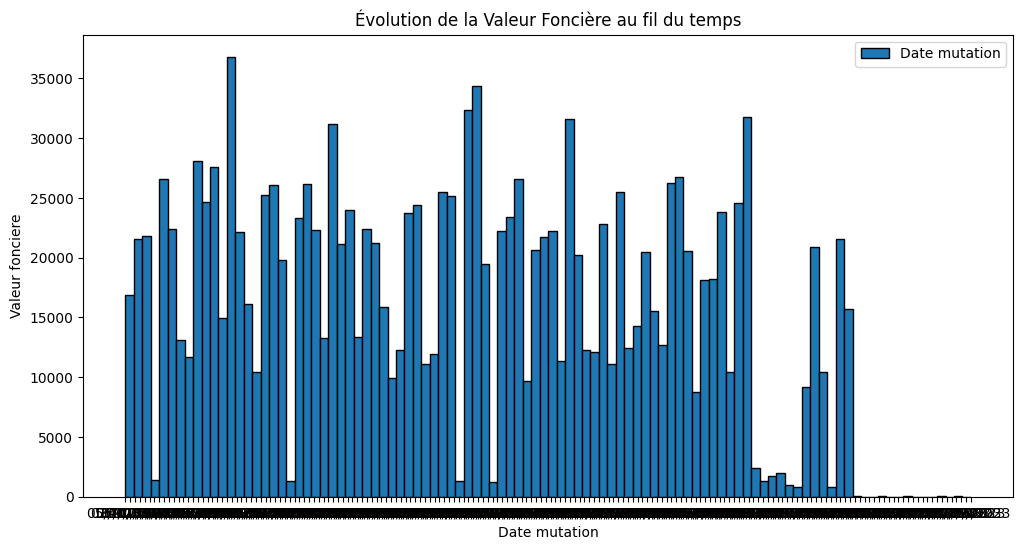

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['Date mutation'], bins=100, edgecolor='black', alpha=1, label='Date mutation')
plt.xlabel('Date mutation')
plt.ylabel('Valeur fonciere')
plt.title('Évolution de la Valeur Foncière au fil du temps')
plt.legend()
plt.show()

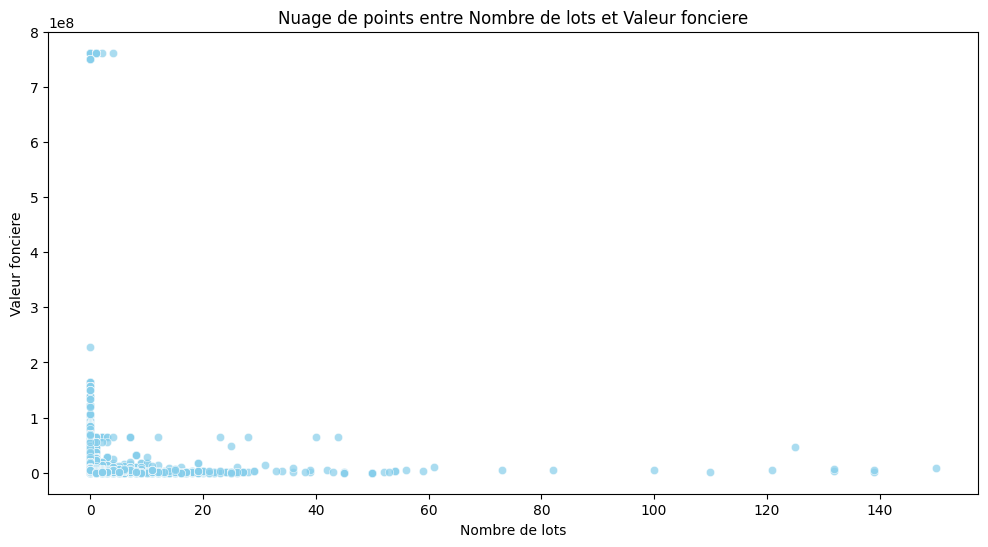

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Nombre de lots', y='Valeur fonciere', alpha=0.7, color='skyblue')
plt.title('Nuage de points entre Nombre de lots et Valeur fonciere')
plt.xlabel('Nombre de lots')
plt.ylabel('Valeur fonciere')
plt.show()

<Axes: title={'center': 'Type local par surface terrestre'}, xlabel='Surface terrain', ylabel='Type local'>

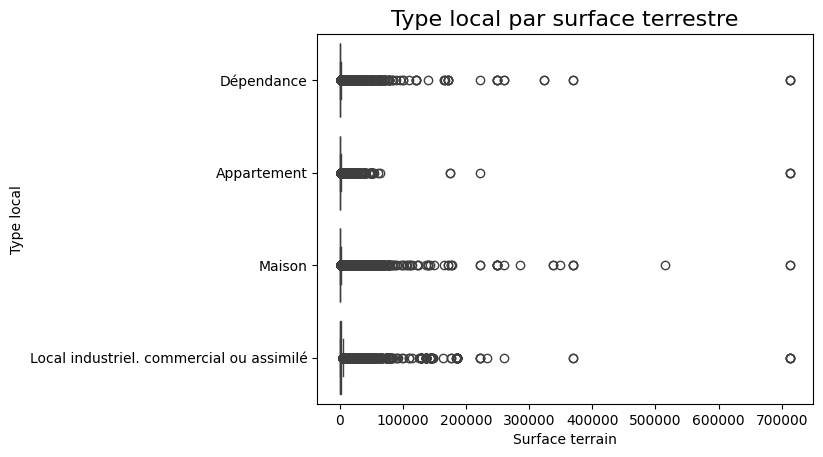

In [ ]:
plt.title('Type local par surface terrestre',fontsize="16")
sns.boxplot(y='Type local', x='Surface terrain', data=df)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


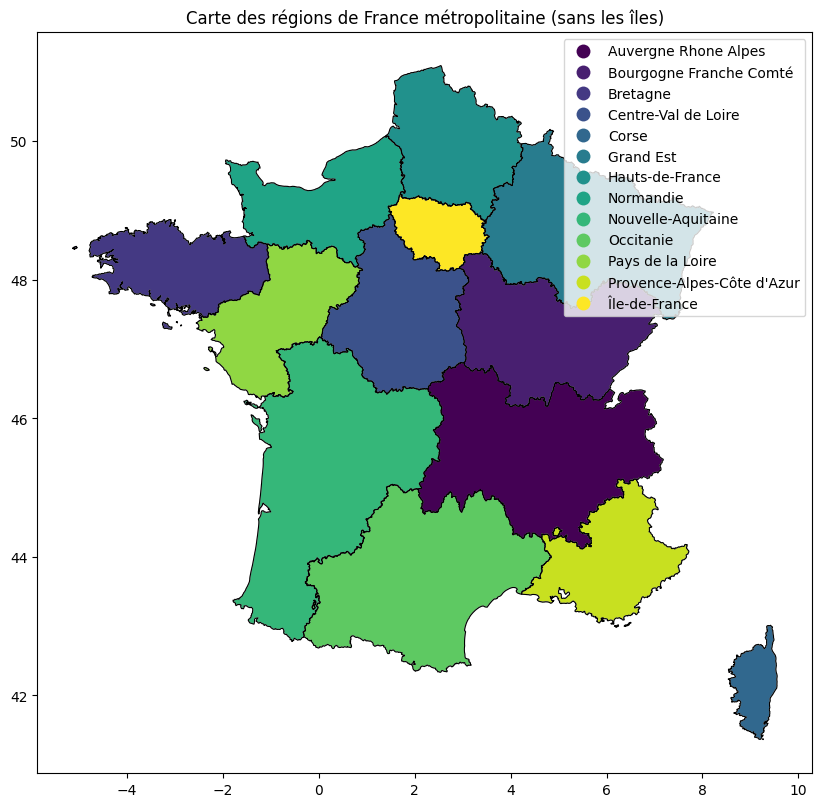

In [ ]:
url_geojson = 'https://france-geojson.gregoiredavid.fr/repo/regions.geojson'
regions = gpd.read_file(url_geojson)

codes_departements_iles = ['01', '02', '03', '04', '06']
regions_metropolitaines = regions[~regions['code'].isin(codes_departements_iles)]

code_par_region = {
    '11': 'Île-de-France',
    '24': 'Centre-Val de Loire',
    '27': 'Bourgogne Franche Comté',
    '28': 'Normandie',
    '32': 'Hauts-de-France',
    '44': 'Grand Est',
    '52': 'Pays de la Loire',
    '53': 'Bretagne',
    '75': 'Nouvelle-Aquitaine',
    '76': 'Occitanie',
    '84': 'Auvergne Rhone Alpes',
    '93': "Provence-Alpes-Côte d'Azur",
    '94': 'Corse',
}
regions_metropolitaines["Region"] = regions_metropolitaines["code"].map(code_par_region)
fig, ax = plt.subplots(figsize=(10, 10))
regions_metropolitaines.boundary.plot(ax=ax, color='black', linewidth=0.8)
regions_metropolitaines.plot(cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, column='Region', legend_kwds={'bbox_to_anchor': (1, 1)})
ax.set_title('Carte des régions de France métropolitaine (sans les îles)')

plt.show()


# Rapport en pourcetage de la différence des prix par type de local entre 2019 et 2023

In [ ]:
# Fonction pour préparer les données pour le prix moyen
def prepare_price_data(df):
    df['Valeur fonciere'] = df['Valeur fonciere'].astype(str)
    df['Valeur fonciere'] = pd.to_numeric(df['Valeur fonciere'].str.replace(',', '.'), errors='coerce')
    df = df.dropna(subset=['Valeur fonciere'])
    resultats = df.groupby('Type local')['Valeur fonciere'].mean()
    resultats = resultats.round(0).astype(int)
    return resultats

# Préparation des données pour 2023 et 2019
price_2023 = prepare_price_data(df)
price_2019 = prepare_price_data(df_2019)

# Fusion des résultats et calcul de l'augmentation en pourcentage
resultats = pd.DataFrame({'Prix moyen 2023': price_2023, 'Prix moyen 2019': price_2019})
resultats['Augmentation Prix Moyen (%)'] = ((resultats['Prix moyen 2023'] - resultats['Prix moyen 2019']) / resultats['Prix moyen 2019']) * 100

print(resultats)

                                          Prix moyen 2023  Prix moyen 2019  \
Type local                                                                   
Appartement                                        600285          2491738   
Dépendance                                         412488          1441417   
Local industriel. commercial ou assimilé          2873279          2372161   
Maison                                             313685           684962   

                                          Augmentation Prix Moyen (%)  
Type local                                                             
Appartement                                                -75.908984  
Dépendance                                                 -71.383160  
Local industriel. commercial ou assimilé                    21.124957  
Maison                                                     -54.204029  


On remarque que les prix ont majoritérement baissé pour tout type de local et cela de manière significatif, sauf pour l

# Rapport en pourcetage du nombre de vente par type de local entre 2019 et 2023

In [ ]:
# Données pour 2023
df = pd.read_csv(url2023, sep="|")
sales_2023 = prepare_sales_data(df)

# Données pour 2019
df_2019 = pd.read_csv(url2019, sep="|")
sales_2019 = prepare_sales_data(df_2019)

# Calcul de l'augmentation
sales_augmentation = ((sales_2023 - sales_2019) / sales_2019) * 100
print("Augmentation du Nombre de Ventes par Type Local de 2019 à 2023:")
print(sales_augmentation)

<ipython-input-17-6f3296eaefa4>:2: DtypeWarning: Columns (18,23,24,26,28,29,31,32,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url2023, sep="|")
<ipython-input-17-6f3296eaefa4>:6: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv(url2019, sep="|")


Augmentation du Nombre de Ventes par Type Local de 2019 à 2023:
Type local
Appartement                                -67.418620
Dépendance                                 -18.513870
Local industriel. commercial ou assimilé   -64.857585
Maison                                     -65.931711
Name: Valeur fonciere, dtype: float64


In [ ]:
url2021 = "https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20231010-092719/valeursfoncieres-2021.txt"
df_2021 = pd.read_csv(url2021, sep="|")

<ipython-input-31-1ba3cdd30650>:2: DtypeWarning: Columns (18,23,24,26,28,29,30,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv(url2021, sep="|")


In [ ]:
url2020 = "https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20231010-092355/valeursfoncieres-2020.txt"
df_2020 = pd.read_csv(url2020, sep="|")

<ipython-input-32-2330b25830a4>:2: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020 = pd.read_csv(url2020, sep="|")


In [ ]:
dfs = [df_2022, df, df_2021, df_2020]
df_combined = pd.concat(dfs)
df_combined['Valeur fonciere'] = pd.to_numeric(df_combined['Valeur fonciere'], errors='coerce')
df_combined['Date mutation'] = pd.to_datetime(df_combined['Date mutation'])
pv = pd.pivot_table(df_combined, index=df_combined['Date mutation'].month,
                    columns=df_combined['Date mutation'].year, values='Valeur fonciere', aggfunc='sum')
pv.plot(marker='o', figsize=(10, 6))
plt.title('Land Value by Month for Different Years')
plt.xlabel('Month')
plt.ylabel('Total Land Value')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Etude valeurs foncières des 10 codes postaux avec le prix moyens le plus chère pré-COVID19

In [ ]:
df_2019['Code postal'] = df_2019['Code postal'].astype(str)
df_2019['Valeur fonciere'] = df_2019['Valeur fonciere'].astype(str)
df_2019['Valeur fonciere'] = pd.to_numeric(df_2019['Valeur fonciere'].str.replace(',', '.'), errors='coerce')
df_2019 = df_2019.dropna(subset=['Valeur fonciere'])
resultats = df_2019.groupby('Code postal').agg({'Valeur fonciere': ['count', 'mean']})
resultats.columns = ['Nombre de ventes', 'Prix moyen']
resultats['Prix moyen'] = resultats['Prix moyen'].round(0).astype(int)
resultats = resultats.sort_values(by='Prix moyen', ascending=False)
top_codes_postaux = resultats.head(10)
print("Les 10 codes postaux avec le prix moyen le plus haut de France et le nombre de ventes associé :")
print(top_codes_postaux)


Les 10 codes postaux avec le prix moyen le plus haut de France et le nombre de ventes associé :
             Nombre de ventes  Prix moyen
Code postal                              
94150.0                   346    68992094
14320.0                   584    43188231
14280.0                   294    41316541
14123.0                  1516    40173032
91160.0                  3261    38985651
91200.0                  2421    34940244
14150.0                  1193    34254107
30110.0                  1775    33301992
34170.0                  1801    32581067
78350.0                  1435    32064349


## Etude valeurs foncières des 10 codes postaux avec le prix moyens le plus chère post-COVID19

In [ ]:
df_2022['Code postal'] = df_2022['Code postal'].astype(str)
df_2022['Valeur fonciere'] = df_2022['Valeur fonciere'].astype(str)
df_2022['Valeur fonciere'] = pd.to_numeric(df_2022['Valeur fonciere'].str.replace(',', '.'), errors='coerce')
df_2022 = df_2022.dropna(subset=['Valeur fonciere'])
resultats = df_2022.groupby('Code postal').agg({'Valeur fonciere': ['count', 'mean']})
resultats.columns = ['Nombre de ventes', 'Prix moyen']
resultats['Prix moyen'] = resultats['Prix moyen'].round(0).astype(int)
resultats = resultats.sort_values(by='Prix moyen', ascending=False)
top_codes_postaux = resultats.head(10)
print("Les 10 codes postaux avec le prix moyen le plus haut de France et le nombre de ventes associé :")
print(top_codes_postaux)


Les 10 codes postaux avec le prix moyen le plus haut de France et le nombre de ventes associé :
             Nombre de ventes  Prix moyen
Code postal                              
56100.0                 13738   246625600
56700.0                  4721   235205957
56000.0                 17242   235086467
56890.0                  2061   148381995
56670.0                   366   146621286
56610.0                   513   138999326
56450.0                  1300   131260125
56880.0                   563   127782603
56870.0                   618   124452288
56860.0                   792   118780071


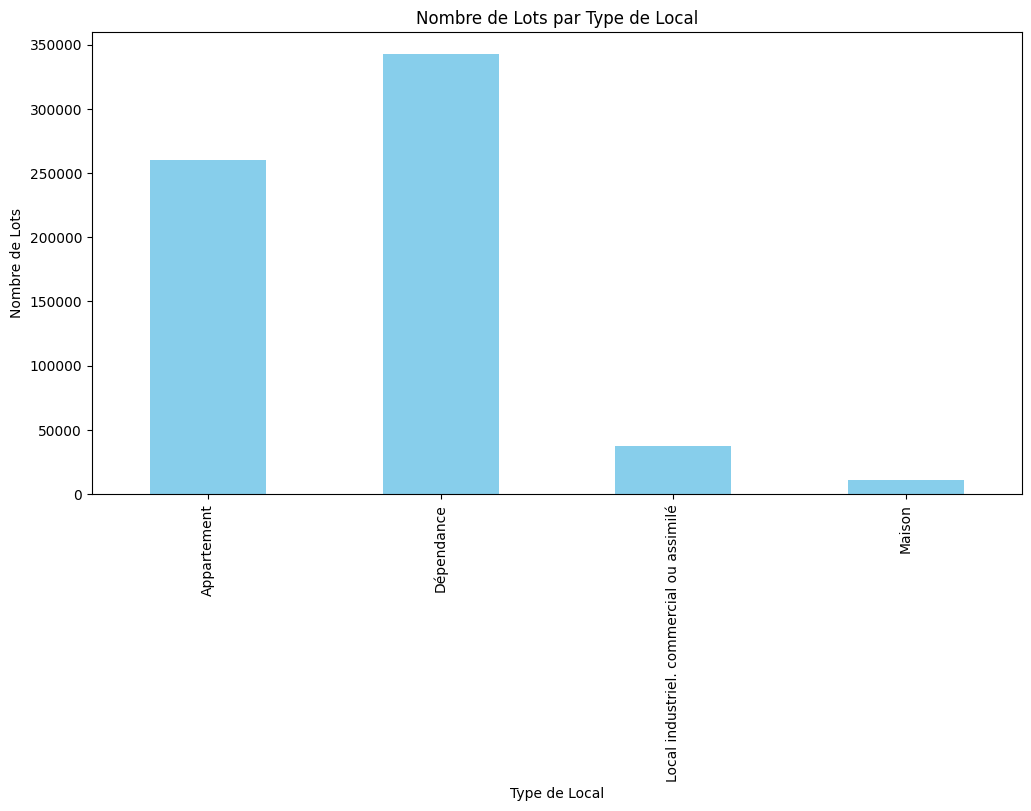

In [ ]:
plt.figure(figsize=(12, 6))
df.groupby('Type local')['Nombre de lots'].sum().plot(kind='bar', color='skyblue')
plt.title('Nombre de Lots par Type de Local')
plt.xlabel('Type de Local')
plt.ylabel('Nombre de Lots')
plt.show()


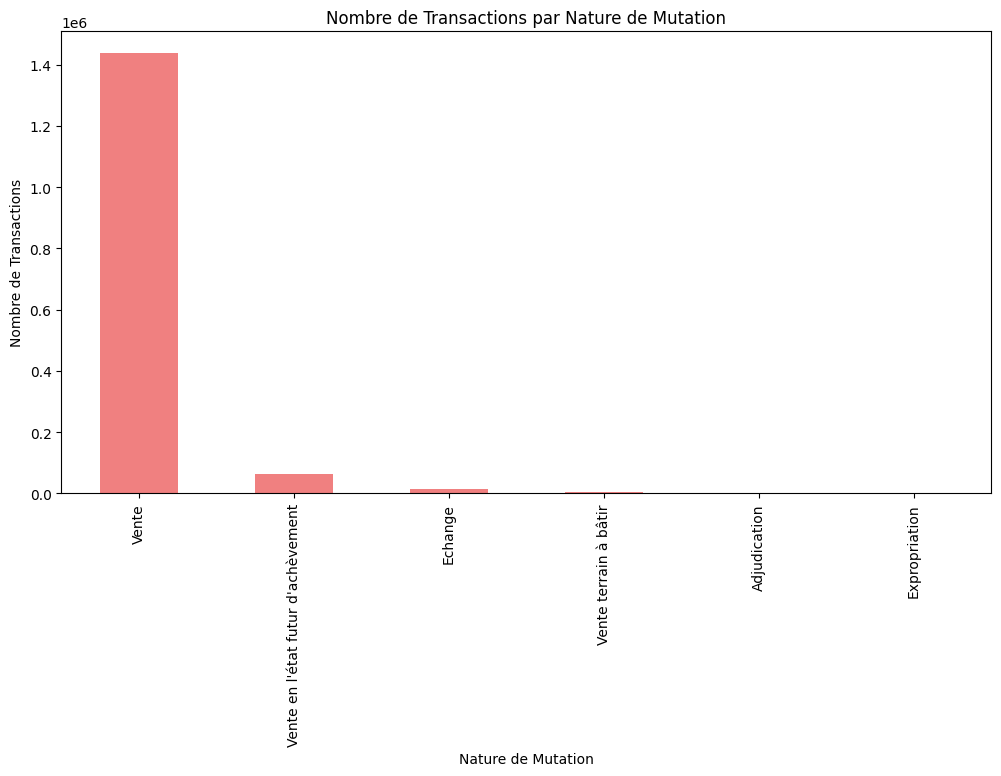

In [ ]:
plt.figure(figsize=(12, 6))
df['Nature mutation'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Nombre de Transactions par Nature de Mutation')
plt.xlabel('Nature de Mutation')
plt.ylabel('Nombre de Transactions')
plt.show()

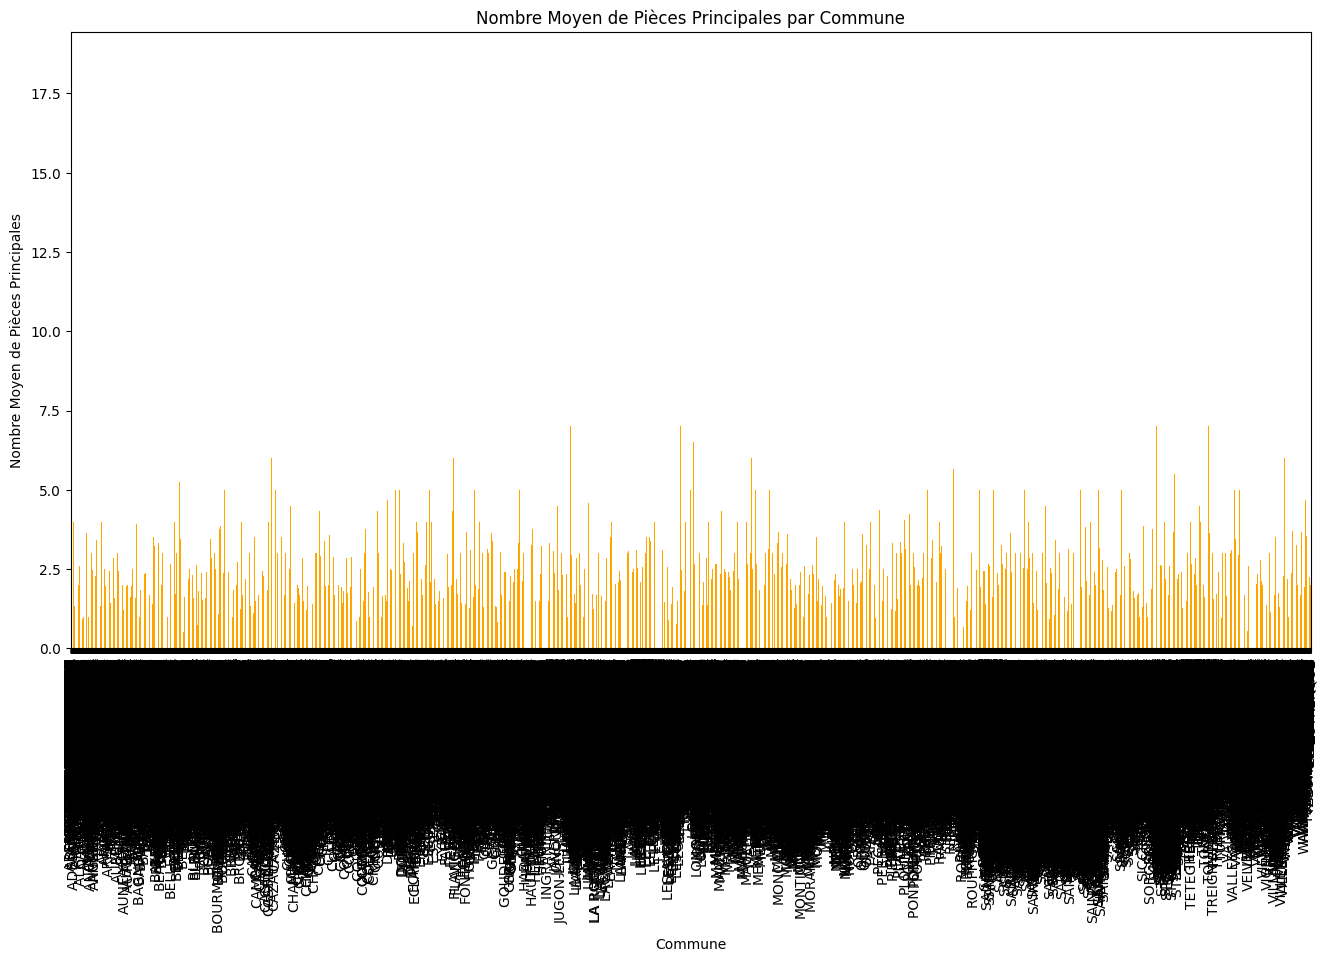

In [ ]:
plt.figure(figsize=(16, 8))
df.groupby('Commune')['Nombre pieces principales'].mean().plot(kind='bar', color='orange')
plt.title('Nombre Moyen de Pièces Principales par Commune')
plt.xlabel('Commune')
plt.ylabel('Nombre Moyen de Pièces Principales')
plt.show()